In [82]:
import uproot
import pandas as pd
import numpy as np
import glob


In [83]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.style.use('belle2')

import os

In [105]:
import glob

base_path = "/share/storage/jykim/storage_b2/storage/reduced_ntuples/MC15rd/Kspip/MC15rd_etaetapip_loose_v3_241129"
cm_elements = ["MCrd_Ks_e7_18_4S_v3", "MCrd_Ks_e20_b26_v1", "MCrd_Ks_e20_e26_4S_v2", "MCrd_Ks_e21_5S_scan_v1", "MCrd_Ks_mori_off_v1"]
cut_expression = "Dp_isSignal == 1"

file_list = []
for element in cm_elements:
    pattern = f"{base_path}/{element}/*.root"
    file_list += glob.glob(pattern)


dataframes = []
# Process each file
for file_name in file_list:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["Ks_K"]

    # Specify the branches you want to extract
    # branches = ['Pip_pionID','Dp_Psum','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan",]  # Replace with actual branch names

    branches = ['Dp_isSignal','Dp_M','Dp_CMS_cosTheta','Pip_cosTheta','Pip_p','Pip_charge','Pip_genMotherPDG','Pip_pionID']
    # Convert the selected branches to a Pandas DataFrame
    # df_temp = tree.arrays(branches, library="pd")
    df_temp = tree.arrays(
        branches,
        library="pd",
        entry_start=None,  # Optional: start at a specific entry
        entry_stop=None,   # Optional: stop at a specific entry
        filter_name=branches,  # Load only specified branches
        cut=cut_expression  # Apply the cut
    )
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df_bkg = pd.concat(dataframes, ignore_index=True)

# df_bkg = df_bkg.query('Dp_isSignal!=1')
# df_bkg = df_bkg.query('(Pip_genMotherID!=etapip_Eta_genMotherID) | abs(Pip_genMotherPDG)!=431 | abs(etapip_Eta_genMotherPDG)!=431')

In [106]:
# df_bkg = df_bkg.query('num_Dstar_no_nan>0')
df_bkg = df_bkg.query('Pip_pionID<0.01')
# df_bkg = df_bkg.query('Dp_M> 1.7 & Dp_M<2.1')
# df_bkg = df_bkg.query('Dp_M> 1.8 & Dp_M<2.05')

In [107]:
df_bkg.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge,Pip_genMotherPDG,Pip_pionID
count,280943.0,280943.000000,280943.000000,280943.000000,280943.000000,280943.000000,280943.000000,2.809430e+05
mean,1.0,1.869482,0.077384,0.314912,1.921389,0.004246,1.745276,4.779025e-04
std,0.0,0.009965,0.520412,0.472876,0.961581,0.999993,410.997026,1.484513e-03
min,1.0,1.600421,-0.996909,-0.919559,0.088399,-1.000000,-411.000000,0.000000e+00
25%,1.0,1.866630,-0.379213,-0.089953,1.223632,-1.000000,-411.000000,6.082647e-13
50%,1.0,1.869593,0.073446,0.388778,1.878756,1.000000,411.000000,5.287955e-08
75%,1.0,1.872515,0.547584,0.755706,2.529942,1.000000,411.000000,4.108403e-05
max,1.0,2.066858,0.999993,0.978118,6.030737,1.000000,411.000000,9.999899e-03


In [108]:
nan_columns = df_bkg.isnull().any()
print(nan_columns)

Dp_isSignal         False
Dp_M                False
Dp_CMS_cosTheta     False
Pip_cosTheta        False
Pip_p               False
Pip_charge          False
Pip_genMotherPDG    False
Pip_pionID          False
dtype: bool


In [109]:
# df_generic_matched = df_bkg.query('Dp_isSignal==1')
df_generic_matched = df_bkg.query('Dp_M>0')


In [110]:
df_generic_matched.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge,Pip_genMotherPDG,Pip_pionID
count,280943.0,280943.000000,280943.000000,280943.000000,280943.000000,280943.000000,280943.000000,2.809430e+05
mean,1.0,1.869482,0.077384,0.314912,1.921389,0.004246,1.745276,4.779025e-04
std,0.0,0.009965,0.520412,0.472876,0.961581,0.999993,410.997026,1.484513e-03
min,1.0,1.600421,-0.996909,-0.919559,0.088399,-1.000000,-411.000000,0.000000e+00
25%,1.0,1.866630,-0.379213,-0.089953,1.223632,-1.000000,-411.000000,6.082647e-13
50%,1.0,1.869593,0.073446,0.388778,1.878756,1.000000,411.000000,5.287955e-08
75%,1.0,1.872515,0.547584,0.755706,2.529942,1.000000,411.000000,4.108403e-05
max,1.0,2.066858,0.999993,0.978118,6.030737,1.000000,411.000000,9.999899e-03


Text(0, 0.5, 'Entries')

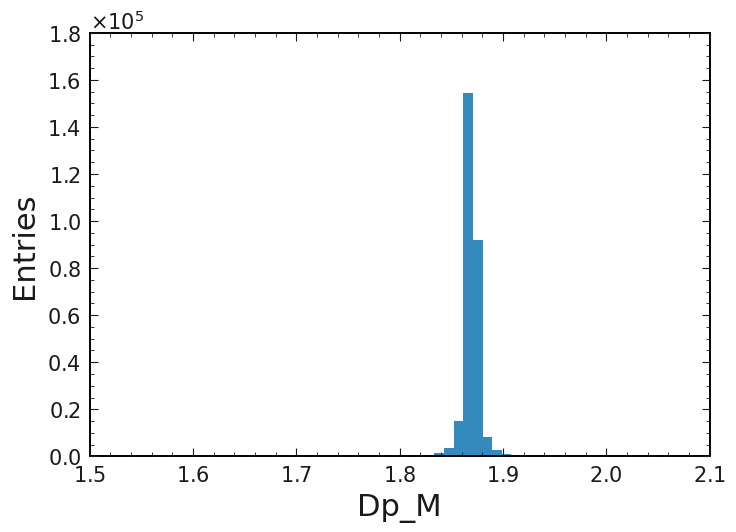

In [111]:
name = "Dp_M"

fig, ax = plt.subplots()

h = make_hist(df_generic_matched[name])

plot_hist(h, ax=ax)

ax.set_xlabel(name)
ax.set_ylabel("Entries")

# fig.savefig("1d_hist_simple.svg", bbox_inches="tight")

In [112]:
base_path_sig = "/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC"
elements_sig = ["DptoetaKp_gg", "DptoetaKp_gg_cc"]
project_name = "241129_loose_v3"

file_list_sig = []
for element in elements_sig:
    pattern = f"{base_path_sig}/{element}/{project_name}/*.root"
    file_list_sig += glob.glob(pattern)

In [113]:
dataframes_signal = []
cut_expression = "Dp_isSignal == 1"  # Replace with your actual cut condition

for file_name in file_list_sig:
    # Load the ROOT file and tree
    file = uproot.open(file_name)
    tree = file["etapip_gg_K"]

    # Specify the branches you want to extract
    #branches = ['Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Dp_Psum','dM_pi0_mask','dM_pi0_mask_2','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    # branches = ['Pip_pionID','Dp_Psum','dM_pi0_mask_nonan','dM_pi0_mask_2_nonan','Pip_genMotherID','etapip_Eta_genMotherID','Pip_genMotherPDG','etapip_Eta_genMotherPDG','Dp_cosHelicityAngleMomentum','Pip_dr',"Dp_isSignal","Dp_cosAngleBetweenMomentumAndVertexVectorInXYPlane", "Pip_p","Dp_CMS_p","etapip_Eta_Easym","etapip_Eta_p","CFT_prob","Dp_M","num_Dstar_no_nan","etapip_Eta_daughterDiffOfPhi_0_1","etapip_Eta_daughterAngle_0_1"]  # Replace with actual branch names
    branches = ['Dp_isSignal','Dp_M','Dp_CMS_cosTheta','Pip_cosTheta','Pip_p','Pip_charge','Pip_genMotherPDG','Pip_pionID']
    # Convert the selected branches to a Pandas DataFrame
    # df_temp = tree.arrays(branches, library="pd")
    df_temp = tree.arrays(
        branches,
        library="pd",
        entry_start=None,  # Optional: start at a specific entry
        entry_stop=None,   # Optional: stop at a specific entry
        filter_name=branches,  # Load only specified branches
        cut=cut_expression  # Apply the cut
    )
    # df_temp = tree.arrays(library="pd")

    # Append the DataFrame to the list
    dataframes_signal.append(df_temp)


df_signal = pd.concat(dataframes_signal, ignore_index=True)


In [114]:
# df_signal = df_signal.query('num_Dstar_no_nan>0')
df_signal = df_signal.query('Pip_pionID<0.01')

In [115]:
df_signal.describe()

,Dp_isSignal,Dp_M,Dp_CMS_cosTheta,Pip_cosTheta,Pip_p,Pip_charge,Pip_genMotherPDG,Pip_pionID
count,729278.0,729278.000000,729278.000000,729278.000000,729278.000000,729278.000000,729278.000000,7.292780e+05
mean,1.0,1.866785,0.081874,0.308357,1.662928,0.010109,4.154646,4.153697e-04
std,0.0,0.016405,0.499918,0.477922,0.960796,0.999950,410.979282,1.398655e-03
min,1.0,1.500725,-0.999982,-0.918106,0.075609,-1.000000,-411.000000,0.000000e+00
25%,1.0,1.860181,-0.343015,-0.091537,0.872567,-1.000000,-411.000000,1.164537e-14
50%,1.0,1.867830,0.083024,0.389037,1.540329,1.000000,411.000000,8.811574e-09
75%,1.0,1.874832,0.519782,0.746557,2.281907,1.000000,411.000000,1.761465e-05
max,1.0,2.099298,0.999990,0.974527,6.348775,1.000000,411.000000,9.999890e-03


Text(0, 0.5, 'Entries')

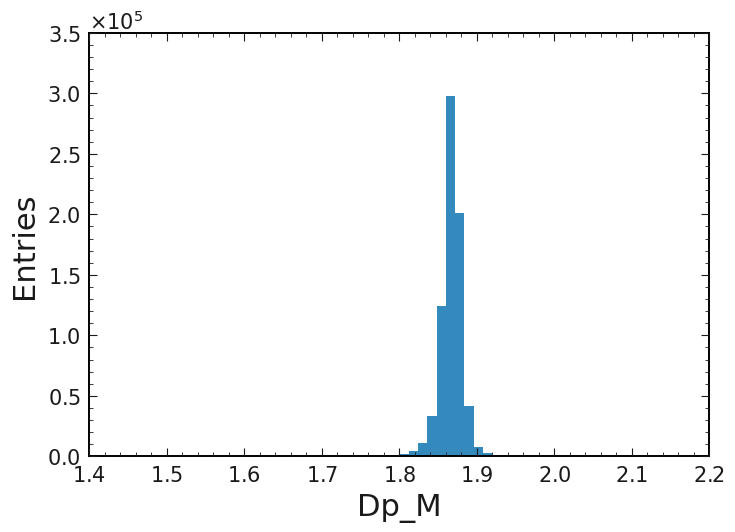

In [116]:
name = "Dp_M"

fig, ax = plt.subplots()

h = make_hist(df_signal[name])

plot_hist(h, ax=ax)

ax.set_xlabel(name)
ax.set_ylabel("Entries")

In [117]:
nan_columns = df_signal.isnull().any()
print(nan_columns)

Dp_isSignal         False
Dp_M                False
Dp_CMS_cosTheta     False
Pip_cosTheta        False
Pip_p               False
Pip_charge          False
Pip_genMotherPDG    False
Pip_pionID          False
dtype: bool


In [118]:
from plothist import make_hist, plot_hist
# import matplotlib.pyplot as plt
from plothist import plot_two_hist_comparison


In [119]:
tree_to_compare = "etapip_gg_K"

In [120]:
plt.rcParams['font.family'] = 'DejaVu Sans'


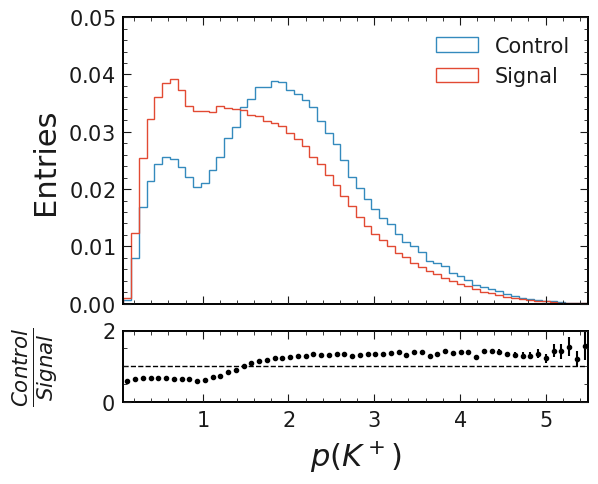

In [121]:
name = "Pip_p"
category = "category"
xlabel = r"$p(K^+)$"

# x1 = df[name][df[category] == 1]
# x2 = df[name][df[category] == 2]

x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (min(min(x1), min(x2)),5.5)

h1 = make_hist(x1, bins=60, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=60, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)

fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")

In [122]:
h1

Histogram(Regular(60, 0.0756092, 5.5, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.999751, variance=3.55855e-06)

In [123]:
h2

Histogram(Regular(60, 0.0756092, 5.5, underflow=False, overflow=False), storage=Weight()) # Sum: WeightedSum(value=0.999857, variance=1.37102e-06)

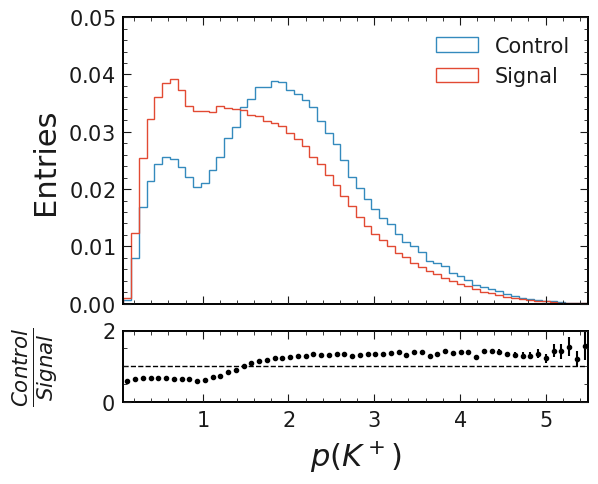

In [124]:
name = "Pip_p"
category = "category"
xlabel = r"$p(K^+)$"

# x1 = df[name][df[category] == 1]
# x2 = df[name][df[category] == 2]

x1 = df_generic_matched.query('abs(Pip_genMotherPDG)==411')[name]
x2 = df_signal.query('abs(Pip_genMotherPDG)==411')[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (min(min(x1), min(x2)),5.5)

h1 = make_hist(x1, bins=60, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=60, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)

fig.savefig(f"MC15rd_{tree_to_compare}_{name}_Dp_daughter.png", bbox_inches="tight")

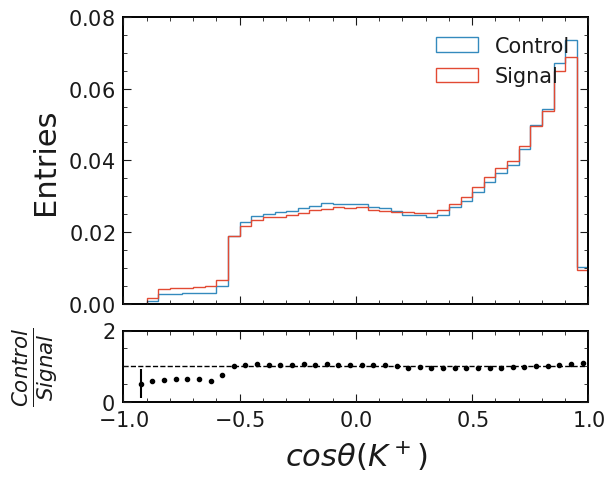

In [125]:
name = "Pip_cosTheta"
category = "category"
xlabel = r"$cos\theta(K^+)$"

# x1 = df[name][df[category] == 1]
# x2 = df[name][df[category] == 2]

x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (-1,1)

h1 = make_hist(x1, bins=40, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=40, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)

fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")

In [126]:
from plothist import (
    create_variable_registry,
    update_variable_registry_ranges,
    get_variable_from_registry,
)
# custom_dict = {"legend_location" : 'upper left'}
# create_variable_registry(custom_dict=custom_dict)

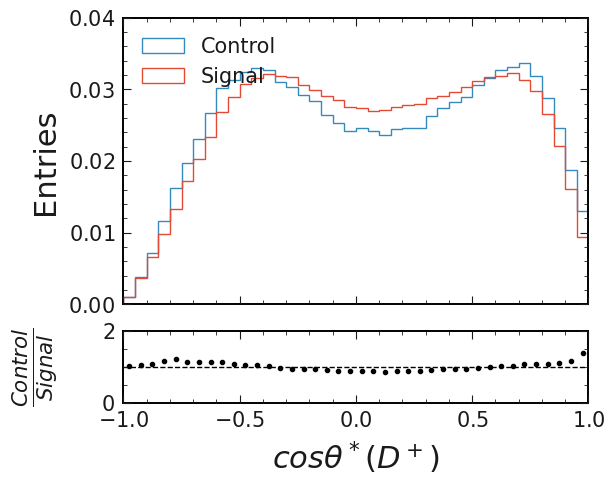

In [127]:
name = "Dp_CMS_cosTheta"
category = "category"
xlabel = r"$cos\theta^*(D^+)$"


x1 = df_generic_matched[name]
x2 = df_signal[name]

# x_range = (min(min(x1), min(x2)), max(max(x1), max(x2)))
x_range = (-1,1)

h1 = make_hist(x1, bins=40, range=x_range, weights=1/len(x1))
h2 = make_hist(x2, bins=40, range=x_range, weights=1/len(x2))


# Default comparison is ratio
fig, ax_main, ax_comparison = plot_two_hist_comparison(
    h1,
    h2,
    xlabel=xlabel,
    ylabel="Entries",
    h1_label="Control",
    h2_label="Signal",
)
# fig.legend(loc="upper left")
ax_main.legend(loc="upper left") 
fig.savefig(f"MC15rd_{tree_to_compare}_{name}.png", bbox_inches="tight")